<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 2 Oktober 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **2 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [15]:
# Isi dengan data diri Anda
NAMA = "Muhammad Irfan Junaidi"
KELAS = "A"
NPM = "1906293202"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "1906350824",
    "1906351051",
    "1906400186",
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/",
    "https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas/46657317"
]

In [16]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Irfan Junaidi dari kelas A dengan NPM 1906293202, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Irfan Junaidi)


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Soal Tugas 1
## [50] Preprocessing
### Diberikan sebuah dataset startup_data, tujuan akhir dari pemrosesan data nantinya adalah memprediksi kolom status. Untuk mempersiapkan data tersebut, kerjakan soal-soal berikut!

In [18]:
startup = pd.read_csv('startup_data.csv')

#### 1. [15] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [19]:
print("Deskripsi setiap atribut")
display(startup.describe(include=(np.number, np.object)))
print("-"*100)

print(f"Jumlah atribut numerik: {len(startup.select_dtypes(include=(np.number)).columns)}")
print(f"Jumlah atribut kategorik: {len(startup.select_dtypes(include=(np.object)).columns)}")
print("-"*100)

print("Jumlah missing values pada tiap column")
display(startup.isnull().sum())
print("-"*100)

print(f"Banyaknya data duplikat: {pd.value_counts(startup.duplicated())[1]}")
print("-"*100)

def count_outlier(df, col):
    iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper = df[col].quantile(0.75) + (iqr * 1.5)
    lower = df[col].quantile(0.25) - (iqr * 1.5)
    return ((df[col] < lower) | (df[col] > upper)).sum()

print("Banyaknya outlier")
for i in startup.select_dtypes(include=np.number).columns:
    print(f"{i:25s}{count_outlier(startup, i)}")
print("-"*100)

Deskripsi setiap atribut


,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
count,949,949.000000,949.000000,949,885.000000,894.000000,946.000000,9.490000e+02,897,949,949,949,949,949,949,901.000000,949,949
unique,35,NaN,NaN,219,NaN,NaN,NaN,NaN,35,2,2,2,2,2,2,NaN,2,2
top,CA,NaN,NaN,1/1/2003,NaN,NaN,NaN,NaN,web,No,No,Yes,No,No,No,NaN,Yes,acquired
freq,499,NaN,NaN,57,NaN,NaN,NaN,NaN,142,637,704,479,577,730,855,NaN,769,610
mean,NaN,38.530398,-103.465916,NaN,2.322209,3.987377,2.313953,1.544590e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857545,NaN,NaN
std,NaN,3.756150,22.382011,NaN,2.941926,3.313172,1.402098,2.446676e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.875341,NaN,NaN
min,NaN,25.752358,-122.756956,NaN,-9.046600,-9.046600,1.000000,-9.500000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,37.388869,-122.200914,NaN,0.517800,1.690375,1.000000,2.700000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN
50%,NaN,37.779281,-118.354605,NaN,1.424700,3.494500,2.000000,1.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN
75%,NaN,40.730646,-77.212493,NaN,3.602700,5.543150,3.000000,2.490000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


----------------------------------------------------------------------------------------------------
Jumlah atribut numerik: 7
Jumlah atribut kategorik: 11
----------------------------------------------------------------------------------------------------
Jumlah missing values pada tiap column


state_code                 0
latitude                   0
longitude                  0
founded_at                 0
age_first_funding_year    64
age_last_funding_year     55
funding_rounds             3
funding_total_usd          0
category_code             52
has_VC                     0
has_angel                  0
has_seriesA                0
has_seriesB                0
has_seriesC                0
has_seriesD                0
avg_participants          48
is_top500                  0
status                     0
dtype: int64

----------------------------------------------------------------------------------------------------
Banyaknya data duplikat: 26
----------------------------------------------------------------------------------------------------
Banyaknya outlier
latitude                 81
longitude                4
age_first_funding_year   24
age_last_funding_year    17
funding_rounds           18
funding_total_usd        71
avg_participants         24
----------------------------------------------------------------------------------------------------


#### 2. [10] Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (Hint: Anda bisa mencari hubungan antar atribut atau melakukan visualisasi sederhana dari atribut tertentu)

In [20]:
(startup
 .groupby([startup.category_code,'status'])
 .funding_total_usd
 .mean()
 .unstack())

status,acquired,closed
category_code,,
advertising,5.477742e+09,3.814107e+07
analytics,1.666179e+07,1.954892e+06
automotive,1.570000e+10,3.630000e+07
biotech,5.796302e+07,4.630129e+07
cleantech,1.091294e+10,9.893820e+07
consulting,1.925000e+07,1.955000e+07
ecommerce,2.247254e+07,6.297615e+06
education,1.382128e+07,1.800000e+06
enterprise,1.937274e+07,1.185951e+07


Dari tabel diatas, dapat dilihat bahwa kategori yang statusnya acquired memiliki rata-rata funding total terbesar pada 2.679527 x 10^7 merupakan kategori semiconductor. Sedangkan, kategori yang statusnya closed memiliki rata-rata funding total terbesar pada 9.893820 x 10^7 merupakan kategori cleantech.

Dapat disimpulkan bahwa startup-startup yang berstatus acquired memiliki dan total funding terbesar merupakan startup semiconductor dan startup-startup yang berstatus closed dan memiliki total funding terbesar merupakan startup cleantech.

#### 3. [15] Lakukan penanganan terhadap missing values, duplikasi data, dan outliers jika ada!

In [21]:
startup_cleaned = pd.DataFrame(data=startup, columns=startup.columns)

# Mengganti Null Values dengan Modus pada kolom kategorik
modus = startup_cleaned[~startup_cleaned.isna()].mode(0)
for c in startup_cleaned.select_dtypes(include=np.object):
    startup_cleaned[c] = startup_cleaned[c].fillna(modus[c])

# Mengganti Null Values dengan Median pada kolom numerik
for c in startup_cleaned.select_dtypes(include=np.number):
    median = startup_cleaned[~startup_cleaned.isna()].median()[0]
    startup_cleaned[c] = startup_cleaned[c].fillna(median)

# Menghilangkan Data Duplikat
startup_cleaned = startup_cleaned.drop_duplicates()

# Mengubah data kategorik menjadi numerik
for c in startup_cleaned.select_dtypes(include=np.object):
    le = LabelEncoder() 
    le.fit(list(startup_cleaned[c].values)) 
    startup_cleaned[c].loc[:] = le.transform(list(startup_cleaned[c].values))

# Mengubah outlier menjadi Median
def change_outlier(df):
    for col in df.columns:
        iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
        upper = df[col].quantile(0.75) + (iqr * 1.5)
        lower = df[col].quantile(0.25) - (iqr * 1.5)
        df[col].loc[(df[col] < lower) | (df[col] > upper)] = df[col].median()

change_outlier(startup_cleaned)

display(startup_cleaned)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,2.0,42.358880,-71.056820,17.0,2.2493,3.0027,3.0,375000.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,0.0
1,2.0,37.238916,-121.973718,10.0,5.1260,9.9973,4.0,40100000.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,4.7500,1.0,0.0
2,2.0,32.901049,-117.192656,108.0,1.0329,1.0329,1.0,-2600000.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,0.0
3,2.0,37.320309,-122.050040,12.0,3.1315,5.3151,3.0,40000000.0,31.0,0.0,0.0,0.0,1.0,0.0,0.0,3.3333,1.0,0.0
4,2.0,37.779281,-122.419236,185.0,1.6712,1.6685,2.0,1300000.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2.0,37.740594,-122.376471,19.0,0.5178,0.5178,1.0,1100000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0000,1.0,0.0
919,12.0,42.504817,-71.195611,8.0,7.2521,3.7479,3.0,52000000.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,2.6667,1.0,1.0
920,2.0,37.408261,-122.015920,9.0,8.4959,8.4959,1.0,44000000.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5000,1.0,1.0
921,2.0,37.556732,-122.288378,19.0,0.7589,2.8329,2.0,15500000.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0000,1.0,0.0


#### 4. [10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

Butuh. Karena jika dilihat pada boxplot diatas terdapat kolom yang memiliki skala yang berbeda. Dengan skala yang sama, tiap feature akan dianggap sama pentingnya dalam machine learning sehingga tidak ada data yang lebih diprioritaskan/dihilangkan. Terlihat bahwa funding_total skalanya sangat besar, sehingga perlu dinormalisasikan.

Bentuk normalisasi yang dapat dilakukan adalah Standarisasi menggunakan RobustScaler. RobustScaler digunakan karena terdapat beberapa outlier dengan nilai yang cukup tinggi sehingga apabila menggunakan StandarScaler kurang baik akibat penggunaan mean dalam perhitungan.

## [50] Dimensionality reduction
### Diberikan sebuah dataset cancer_reg, lalu lakukanlah dimensionality reduction dengan mengikuti instruksi berikut!

In [23]:
cancer = pd.read_csv('cancer_reg.csv')
X = cancer.iloc[:, cancer.columns != 'TARGET_deathRate'].values
y = cancer.iloc[:, 2].values

#### 5. [10] Visualisasikan dataset tersebut dengan menggunakan t-SNE! (2 komponen)

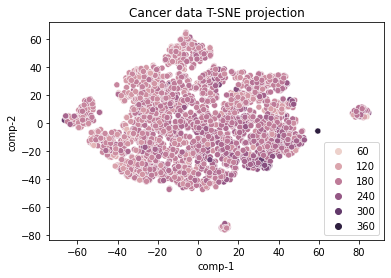

In [24]:
tsne = TSNE(n_components=2, random_state=123)

X_std = StandardScaler().fit_transform(X)

z = tsne.fit_transform(X_std)

df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", data=df_tsne, hue=df_tsne.y.tolist()).set(title="Cancer data T-SNE projection")
plt.show()

#### 6. [20] Implementasikan step-by-step PCA secara manual pada data hasil preprocessing! Pilih jumlah komponen utama yang menurut Anda sebaiknya digunakan sehingga dapat menggambarkan data dengan baik. Sertakan juga alasan yang mendasari Anda melakukan pemilihan tersebut! (Hint: Anda bisa menggunakan rasio kumulatif dari nilai eigen ke-i sebagai persentase variance yang dapat di-cover oleh i nilai eigen tertinggi) Catatan: penggunaan library yang diperbolehkan pada implementasi hanya library numpy dan pandas

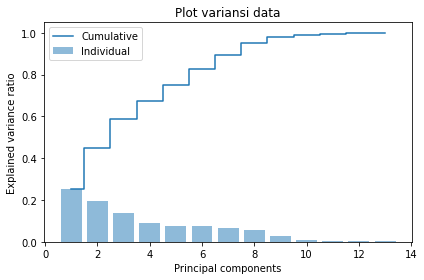

----------------------------------------------------------------------------------------------------
Hasil transformasi
[[-1.27296947 -0.96264796  0.78391853 ...  0.27875874  0.26710376
  -0.18528036]
 [-0.64568965  1.76710155  0.85367422 ... -0.56008092 -0.30308909
   1.36350756]
 [ 0.91498347 -0.81598335  0.05367155 ... -0.67011723 -1.65371797
   0.32170192]
 ...
 [-1.7198551   1.03011076  2.45801086 ...  1.54967845 -1.02836362
  -0.24088376]
 [-0.33222367 -0.57906673  1.1001662  ...  0.12913888  0.87484964
  -0.19305086]
 [-1.64802853  1.61847152  2.93827191 ...  0.33255509  1.49574118
   0.15166513]]
----------------------------------------------------------------------------------------------------
Nilai Eigen
[3.26192282 2.55513657 1.79572814 0.01942892 0.076394   0.06129216
 0.12465289 0.36915056 1.15591566 0.72669086 0.87776926 1.0034783
 0.97670777]


In [25]:
# Menghitung covariance matrix 
cov_mat = np.cov(X_std.T)

# Menghirung Eigen values dan Eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Membuat list dari tuple (eigenvalue, eigenvector) 
eig_pairs = [(np. abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Mengurutkan eig_pairs dari nilai eigen tertinggi ke terendah
eig_pairs.sort() 
eig_pairs.reverse() 

# Explained variance
tot = sum(np.abs(eig_vals)) 
var_exp = [(i / tot) for i in sorted(np.abs(eig_vals), reverse=True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual') 
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid',  label='Cumulative') 
plt.title('Plot variansi data')
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

# Membuat proyeksi matriks W berordo 13x8
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1), eig_pairs[1][1].reshape(13,1), eig_pairs[2][1].reshape(13,1), eig_pairs[3][1].reshape(13,1), eig_pairs[4][1].reshape(13,1), eig_pairs[5][1].reshape(13,1), eig_pairs[6][1].reshape(13,1), eig_pairs[7][1].reshape(13,1)))

# Transformasi dataset asli X melalui W untuk mendapatkan subruang fitur k-dimensi Y
Y = X_std.dot(matrix_w)

print("-"*100)

print("Hasil transformasi")
print(Y)

print("-"*100)

print("Nilai Eigen")
print(eig_vals)

Dipilih 8 komponen utama karena jika dilihat pada plot di atas, dengan menggunakan 8 komponen, hampir seluruh data dapat dijelaskan oleh 8 komponen tersebut.

#### 7. [10] Implementasikan PCA menggunakan library scikit-learn dengan:
> a. Jumlah komponen utama sebanyak 2. Visualisasikan hasil transformasi dengan menggunakan scatter plot!

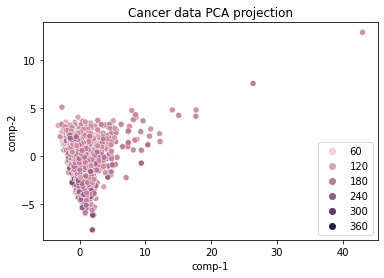

In [26]:
# PCA scikit-learn
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)

# PCA Plot
df_pca = pd.DataFrame()
df_pca["y"] = y
df_pca["comp-1"] = skl_pca[:,0]
df_pca["comp-2"] = skl_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", data=df_pca, hue=df_pca.y.tolist()).set(title="Cancer data PCA projection")
plt.show()

> b. Jumlah komponen utama yang sama pada nomor 6. Tampilkan hasil transformasi beserta dengan nilai eigen dari implementasi tersebut!

In [27]:
# PCA scikit-learn
pca_8 = PCA(n_components=8)
skl_pca_8 = pca_8.fit_transform(X_std)

print("Hasil Transformasi")
print(skl_pca_8)

print("-"*100)

print("Nilai Eigen")
print(pca_8.explained_variance_)

Hasil Transformasi
[[ 1.27296947  0.96264796 -0.78391853 ...  0.27875874 -0.26710376
   0.18528036]
 [ 0.64568965 -1.76710155 -0.85367422 ... -0.56008092  0.30308909
  -1.36350756]
 [-0.91498347  0.81598335 -0.05367155 ... -0.67011723  1.65371797
  -0.32170192]
 ...
 [ 1.7198551  -1.03011076 -2.45801086 ...  1.54967845  1.02836362
   0.24088376]
 [ 0.33222367  0.57906673 -1.1001662  ...  0.12913888 -0.87484964
   0.19305086]
 [ 1.64802853 -1.61847152 -2.93827191 ...  0.33255509 -1.49574118
  -0.15166513]]
----------------------------------------------------------------------------------------------------
Nilai Eigen
[3.26192282 2.55513657 1.79572814 1.15591566 1.0034783  0.97670777
 0.87776926 0.72669086]


#### 8. [10] Berikan analisis Anda secara singkat mengenai perbedaan:
> a. Hasil yang Anda dapatkan pada nomor 5 dan nomor 7a!

Hasil yang didapat pada nomor 5 dan nomor 7a berbeda karena metode reduksi dimensi yang digunakan juga berbeda. tSNE dalam melakukan reduksi dimensi dengan mempertahankan jarak antar pasangan yang kecil/mirip. Sedangkan, PCA melakukan reduksi dimensi dengan memaksimalkan varians dan mempertahankan jarak antar pasangan yang besar.

> b. Hasil yang Anda dapatkan pada nomor 6 dan nomor 7b!

Hasil yang didapat pada nomor 6 dan nomor 7b berbeda sedikit. Perbedaan terletak hanya pada hasil transformasi di mana Matriks nomor 6 merupakan Matriks nomor 7b dikali dengan -1. Untuk Nilai eigennya tetap sama. 